In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("file_warmindo.csv")
data

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,1,1,4/11/22,44,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,QRIS-OVO,Dine-In,18000
1,2,2,8/1/22,10,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,CASH,Delivery,18000
2,3,3,4/3/22,62,Indomie Rasa Soto Betawi,mie-kuah,makanan,1,10000,QRIS-OTHERS,Delivery,10000
3,4,4,3/19/22,48,Indomie Rasa Soto Padang,mie-kuah,makanan,3,10000,CASH,Dine-In,30000
4,5,5,4/29/22,87,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-OVO,Dine-In,20000
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,495,5/17/22,11,Indomie Baso Sapi,mie-kuah,makanan,1,9000,CASH,Delivery,9000
495,496,496,6/6/22,55,Indomie Goreng Spesial,mie-goreng,makanan,1,9000,QRIS-GOPAY,Delivery,9000
496,497,497,7/14/22,25,Indomie Goreng Rendang,mie-goreng,makanan,2,9000,QRIS-GOPAY,Delivery,18000
497,498,498,8/22/22,39,Indomie Goreng Pedas,mie-goreng,makanan,2,9000,QRIS-DANA,Delivery,18000


In [8]:
data.describe()

,id,invoice_id,customer_id,quantity,harga_jual,nilai_penjualan
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,250.000000,48.016032,1.953908,9438.877756,18440.881764
std,144.193157,144.193157,28.521811,0.796503,496.748002,7575.722958
min,1.000000,1.000000,1.000000,1.000000,9000.000000,9000.000000
25%,125.500000,125.500000,22.000000,1.000000,9000.000000,10000.000000
50%,250.000000,250.000000,48.000000,2.000000,9000.000000,18000.000000
75%,374.500000,374.500000,72.500000,3.000000,10000.000000,27000.000000
max,499.000000,499.000000,100.000000,3.000000,10000.000000,30000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 499 non-null    int64 
 1   invoice_id         499 non-null    int64 
 2   tanggal_transaksi  499 non-null    object
 3   customer_id        499 non-null    int64 
 4   nama_produk        499 non-null    object
 5   jenis_produk       499 non-null    object
 6   kategori_produk    499 non-null    object
 7   quantity           499 non-null    int64 
 8   harga_jual         499 non-null    int64 
 9   jenis_pembayaran   499 non-null    object
 10  jenis_pesanan      499 non-null    object
 11  nilai_penjualan    499 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 46.9+ KB


In [10]:
data.drop(['id', 'invoice_id', 'customer_id'] , axis='columns', inplace=True)

In [11]:
data['tanggal_transaksi'] = pd.to_datetime(data['tanggal_transaksi'])

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_17900\1418502273.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tanggal_transaksi'] = pd.to_datetime(data['tanggal_transaksi'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tanggal_transaksi  499 non-null    datetime64[ns]
 1   nama_produk        499 non-null    object        
 2   jenis_produk       499 non-null    object        
 3   kategori_produk    499 non-null    object        
 4   quantity           499 non-null    int64         
 5   harga_jual         499 non-null    int64         
 6   jenis_pembayaran   499 non-null    object        
 7   jenis_pesanan      499 non-null    object        
 8   nilai_penjualan    499 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 35.2+ KB


In [13]:
data.head()

,tanggal_transaksi,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,2022-04-11,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,QRIS-OVO,Dine-In,18000
1,2022-08-01,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,CASH,Delivery,18000
2,2022-04-03,Indomie Rasa Soto Betawi,mie-kuah,makanan,1,10000,QRIS-OTHERS,Delivery,10000
3,2022-03-19,Indomie Rasa Soto Padang,mie-kuah,makanan,3,10000,CASH,Dine-In,30000
4,2022-04-29,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-OVO,Dine-In,20000


In [14]:
object = data.select_dtypes(include=['object']).columns.tolist()

for i in object:
    print(f'{i}: {data[i].unique()}')

nama_produk: ['Indomie Ayam Spesial' 'Indomie Rasa Soto Betawi'
 'Indomie Rasa Soto Padang' 'Indomie Rasa Sop Buntut' 'Indomie Baso Sapi'
 'Indomie Soto Mie' 'Indomie Goreng Cabe Ijo' 'Indomie Goreng Aceh'
 'Indomie Goreng Sambal Matah' 'Indomie Rasa Mi Kocok Bandung'
 'Indomie Goreng Spesial' 'Indomie Rasa Soto Banjar Limau Kuit'
 'Indomie Goreng Pedas' 'indomie Kari Ayam' 'Indomie Goreng Rendang'
 'indomie Ayam Bawang' 'Indomie Rasa Soto Lamongan'
 'Indomie Rasa Empal Gentong']
jenis_produk: ['mie-kuah' 'mie-goreng']
kategori_produk: ['makanan']
jenis_pembayaran: ['QRIS-OVO' 'CASH' 'QRIS-OTHERS' 'QRIS-DANA' 'QRIS-GOPAY' 'QRIS-SHOPEEPAY']
jenis_pesanan: ['Dine-In' 'Delivery']


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_17900\1222653456.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=jumlah_produk, x='jumlah_terjual', y='nama_produk', palette='mako')


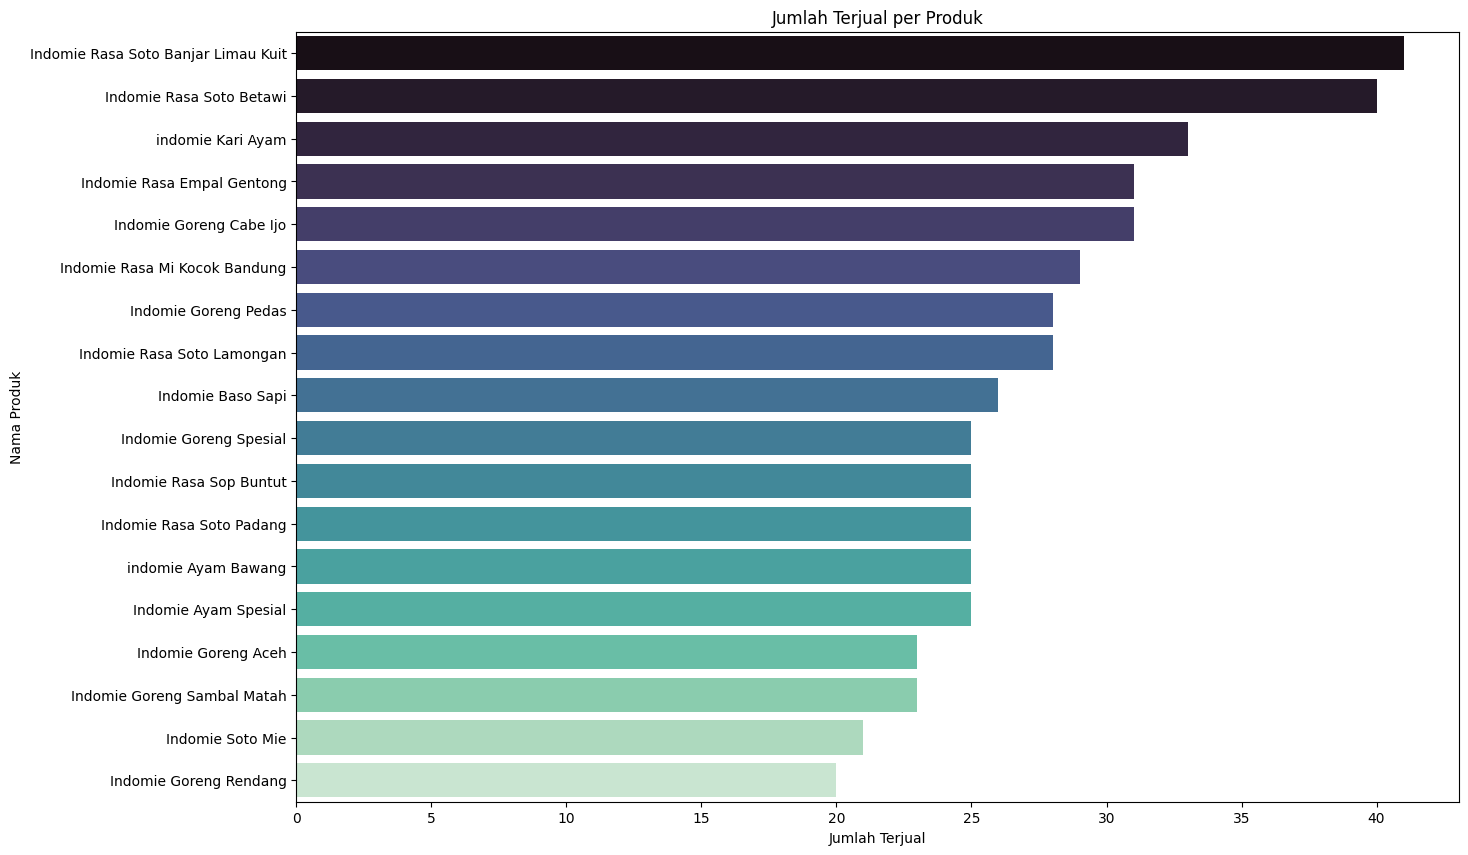

In [15]:
# Menghitung jumlah setiap nama_produk dalam dataset
jumlah_produk = data['nama_produk'].value_counts().reset_index()

# Ubah nama kolom agar lebih jelas
jumlah_produk.columns = ['nama_produk', 'jumlah_terjual']

plt.figure(figsize=(15, 10))
sns.barplot(data=jumlah_produk, x='jumlah_terjual', y='nama_produk', palette='mako')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')
plt.title('Jumlah Terjual per Produk')
plt.show()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_17900\752580671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_quantity_per_harga, x='harga_jual', y='quantity', palette='mako')


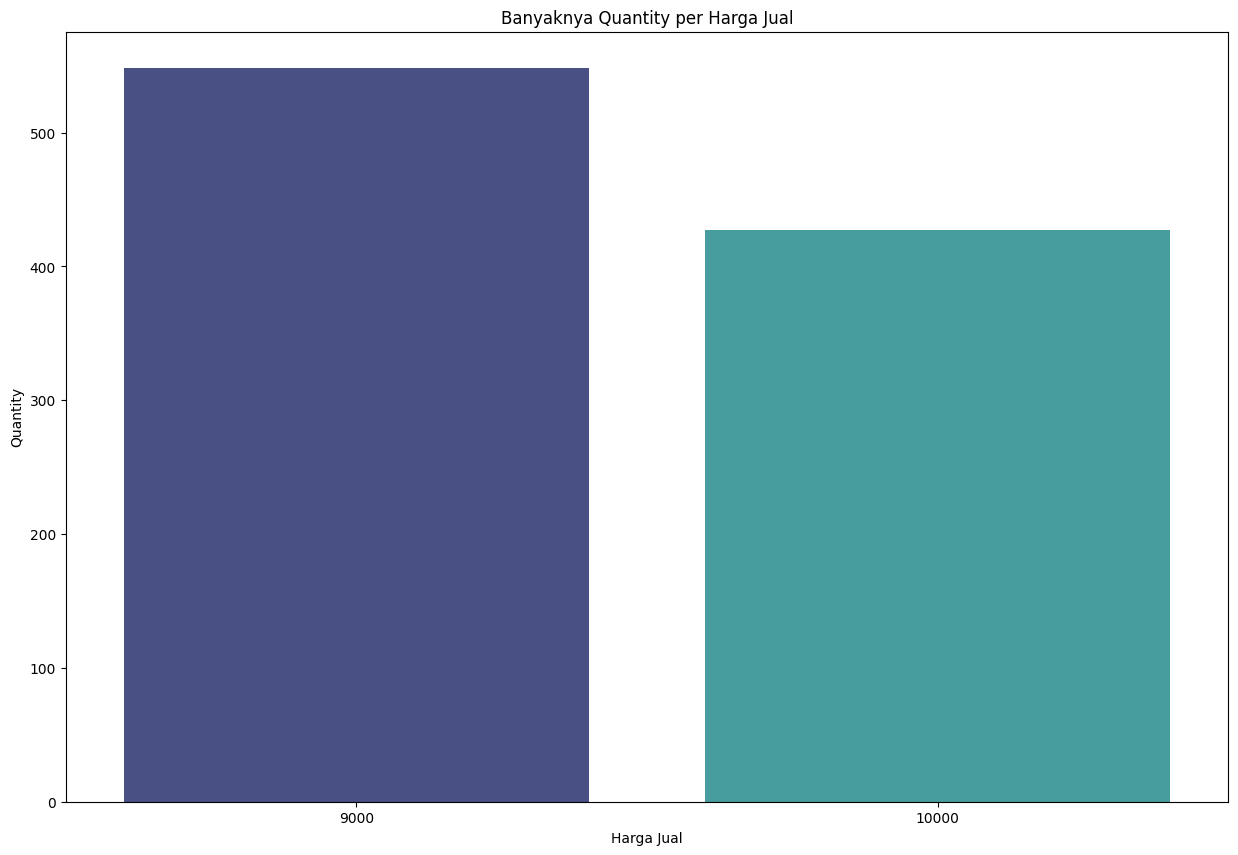

In [16]:
# Mengelompokkan berdasarkan harga jual dan menjumlahkan quantity
total_quantity_per_harga = data.groupby('harga_jual')['quantity'].sum().reset_index()

plt.figure(figsize=(15, 10))
sns.barplot(data=total_quantity_per_harga, x='harga_jual', y='quantity', palette='mako')
plt.xlabel('Harga Jual')
plt.ylabel('Quantity')
plt.title('Banyaknya Quantity per Harga Jual')
plt.show()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_17900\2142370925.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='jenis_pesanan', palette='mako')


<Axes: xlabel='jenis_pesanan', ylabel='count'>

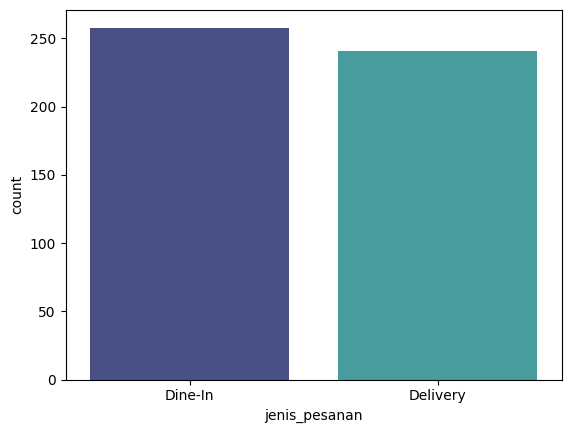

In [17]:
sns.countplot(data=data, x='jenis_pesanan', palette='mako')

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_17900\1248130982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='jenis_pembayaran', palette='mako')


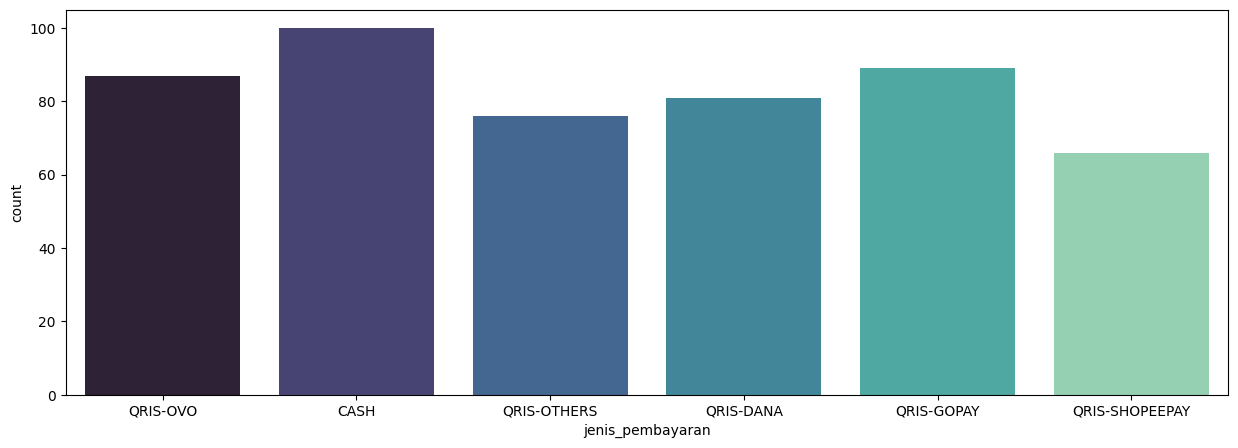

In [18]:
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='jenis_pembayaran', palette='mako')
plt.show()

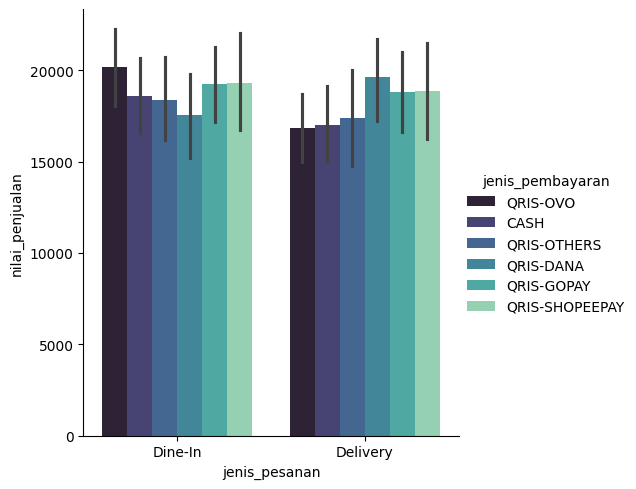

In [19]:
sns.catplot(data=data, x='jenis_pesanan', y='nilai_penjualan', hue='jenis_pembayaran', kind='bar', palette='mako')

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_17900\2662085005.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='jenis_pesanan', y='nilai_penjualan', palette='mako')


<Axes: xlabel='jenis_pesanan', ylabel='nilai_penjualan'>

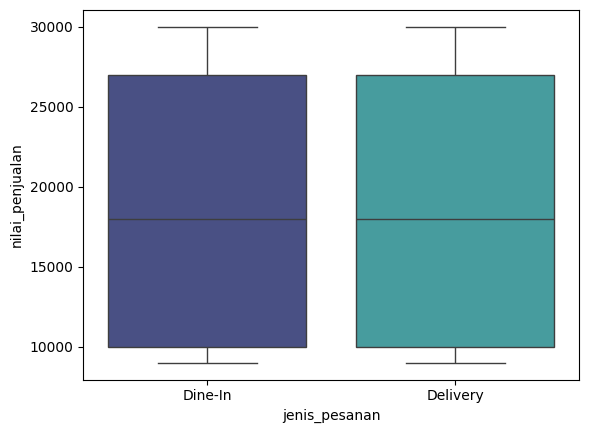

In [20]:
sns.boxplot(data=data, x='jenis_pesanan', y='nilai_penjualan', palette='mako')

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_17900\2166158446.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=daily_sales, palette='mako')


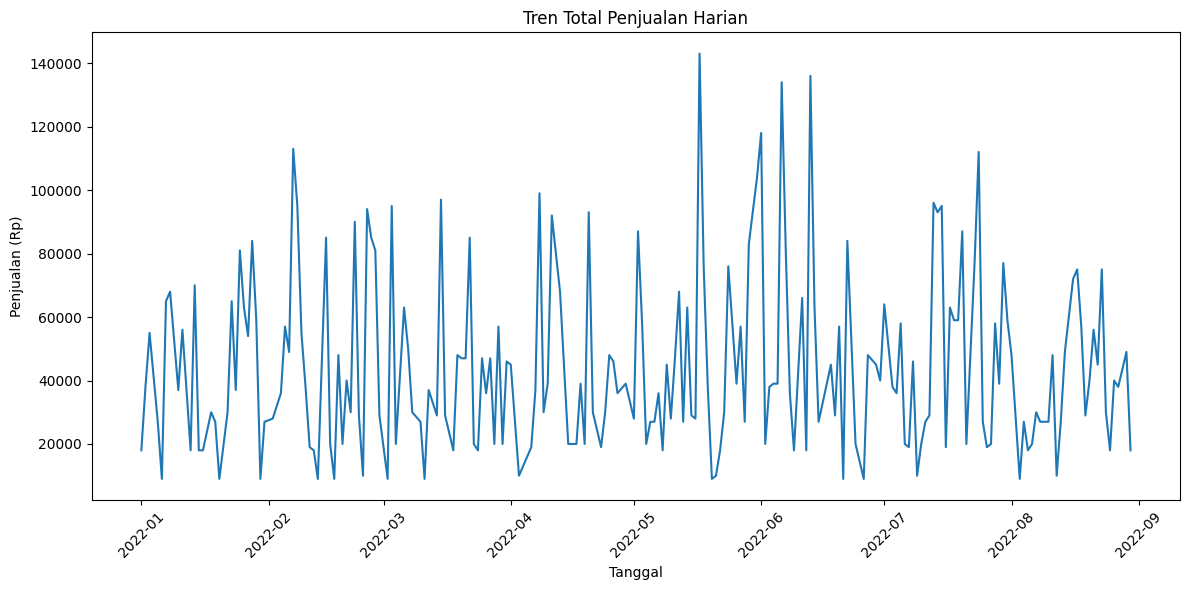

In [ ]:
data['total_penjualan'] = data['harga_jual'] * data['quantity']

daily_sales = data.groupby('tanggal_transaksi')['total_penjualan'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales, palette='mako')
plt.title("Tren Total Penjualan Harian")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan (Rp)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
penjualan_terbesar = daily_sales.max()

for i in daily_sales.items():
    if i[1] == penjualan_terbesar:
        print(f'Penjualan terbesar ada di tanggal {i[0]}')

Penjualan terbesar ada di tanggal 2022-05-17 00:00:00
